In [ ]:
#ant_function
import matplotlib.pyplot as plt
import random 
import numpy as np

from IPython.display import display, clear_output
import time

num_ants = 100
x_dim = 70
y_dim = 30
smell = np.zeros((x_dim,y_dim))
food = np.zeros((x_dim,y_dim))

#place food
food[45:50, 25:30] = 10
food[45:50, 25:30] = 10
food[65:70, 0:5] = 10

x_loc = np.random.randint(0,x_dim,size=(num_ants,1))
y_loc = np.random.randint(0,y_dim,size=(num_ants,1))
ant_loc = np.concatenate((x_loc,y_loc), axis=1)

has_food = np.zeros((num_ants,1))

directions = ['up', 'left', 'down', 'right']

fig, ax = plt.subplots(figsize=(10,5))

#Main simulation loop
for i in range(0,100):
    
    #Loop over ants
    for a in range(0,num_ants):
        x = ant_loc[a,0]
        y = ant_loc[a,1]
        
        if(x == 0 and y == 0):
            has_food[a] = 0
        
        if(has_food[a] == 1):
            pick = np.zeros(x+y)
            pick[0:x] = 1
            if(np.random.choice(pick)==1):
                x -= 1
            else:
                y -= 1
                
            if(x < 0):
                x = 0
            if(y < 0):
                y = 0
            
            smell[x,y] = smell[x,y] + 100

        else:

            #First check to see if there is food up and to the right.
            g = [] #follow gradient
            m  = [] 

            if(x + 1 < x_dim):
                if(smell[x+1, y] > 0):
                    m.append(smell[x+1,y])
                    g.append('right')
            if(y + 1 < y_dim):
                if(smell[x, y+1] > 0):
                    m.append(smell[x, y+1])
                    g.append('up')
            if(g != []):
                grad = g[m.index(max(m))]
                #print("Following smell", grad)
            else:
                #else just pick a random direction.
                grad = random.choice(directions)
                #print("Choosing ",grad)

            # move the ant
            if(grad == 'up'):
                y = y + 1
            elif(grad == 'right'):
                x = x + 1
            elif(grad == 'down'):
                y = y - 1
            elif(grad == 'left'):
                x = x - 1
            else:
                print(grad)
                print("ERROR!!!!!!!!!!!!")

            #make sure we don't go off the gird. 
            if(x < 0):
                x = 0
            if(y < 0):
                y = 0
            if(x > x_dim-1):
                x = x_dim-1
            if(y > y_dim-1):
                y = y_dim-1

            if food[x, y] > 0:
                food[x,y] -= 1
                has_food[a] = 1
        ant_loc[a,0] = x
        ant_loc[a,1] = y
        
    smell = smell - 1
    smell[smell < 0] = 0

    #plot world
    plt.imshow(food.T, origin='lower', aspect='equal', cmap="magma")
    for a in range(0,num_ants):
        color = 'r'
        if (has_food[a] == 1):
            color = 'g'
        plt.scatter(ant_loc[a,0], ant_loc[a,1], color=color)

    # Animaiton part (doesn't change)
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots
    time.sleep(0.0001)      # Sleep for a fraction of a second to allow animation to catch up

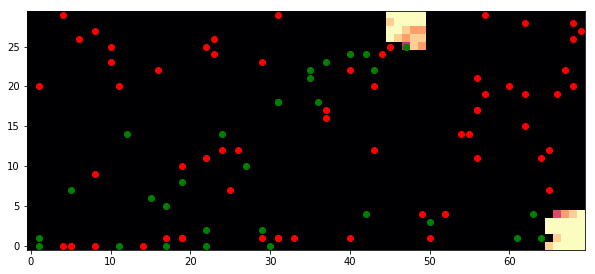

<Figure size 720x360 with 0 Axes>

In [2]:
%matplotlib inline
import ant_function
ant_function.run()